In [103]:
import pandas as pd

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns  

In [105]:
df = pd.read_csv('adult.csv')

In [106]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [107]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [108]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [109]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [110]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [111]:
# number of duplicates
df.duplicated().sum() 

52

In [112]:
# get rid of the duplicates and check again
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum() 

0

<Axes: title={'center': 'Number of individuals by income'}, xlabel='income', ylabel='count'>

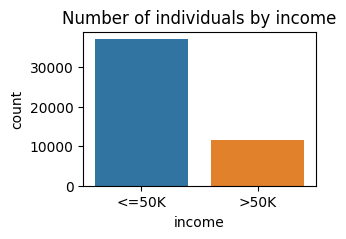

In [113]:
# displaying the total number of individuals by income
# there are more individuals that has makes less than 50K
plt.figure(figsize=(3,2))
plt.title('Number of individuals by income', fontdict={'fontsize':12})
sns.countplot(x="income", data=df, order=df['income'].value_counts().index)

<Axes: title={'center': 'Hours per Week'}, xlabel='hours-per-week', ylabel='Count'>

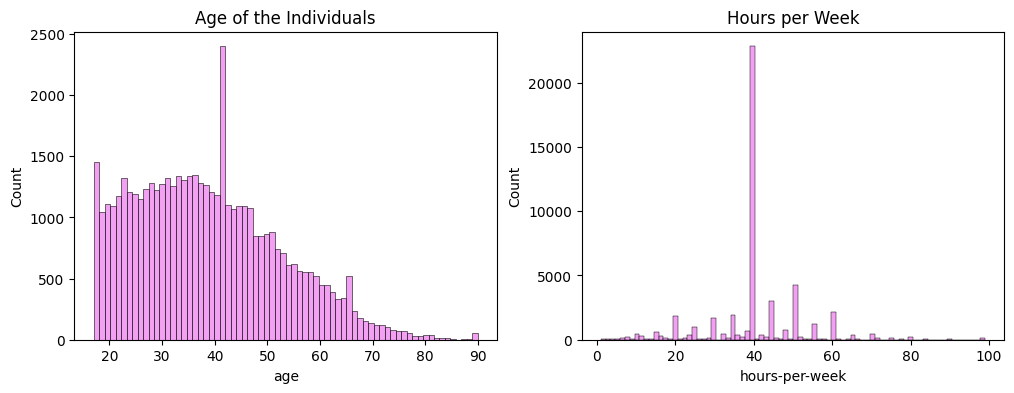

In [114]:
plt.figure(figsize=(12,4))
# showing histogram of the individual's age
plt.subplot(1,2,1)
plt.title('Age of the Individuals', fontdict={'fontsize':12})
sns.histplot(df.age, color='violet', bins=70)

# showing histogram of how much an individual work per week
plt.subplot(1,2,2)
plt.title('Hours per Week', fontdict={'fontsize':12})
sns.histplot(df['hours-per-week'], color='violet', bins=80)

# both has huge outliers

<Axes: title={'center': 'Individuals by Gender in %'}>

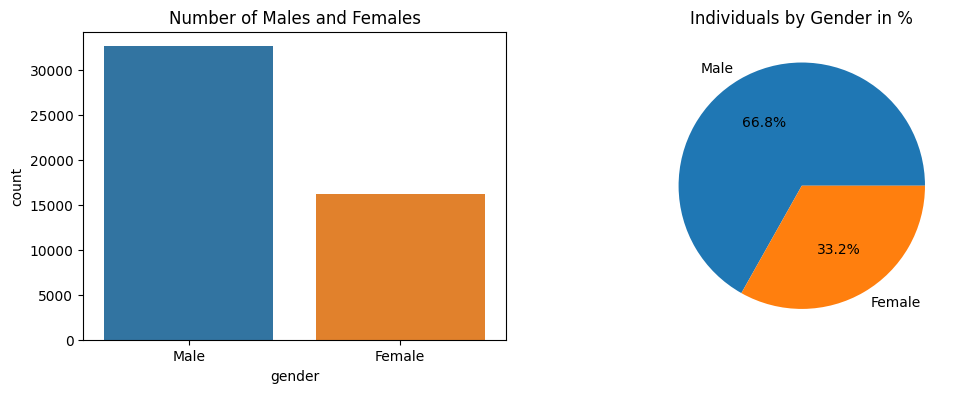

In [115]:
plt.figure(figsize=(12,4))
# showing the gender counts with bar graph
plt.subplot(1,2,1)
plt.title('Number of Males and Females', fontdict={'fontsize':12})
sns.countplot(x="gender", data=df, order=df['gender'].value_counts().index)

# gender graph
plt.subplot(1,2,2)
plt.title('Individuals by Gender in %', fontdict={'fontsize':12})
df['gender'].value_counts().plot(kind='pie', legend=None, ylabel='', autopct='%1.1f%%')

<Axes: title={'center': 'Gender and salary <= 50k (in Units)'}, xlabel='gender'>

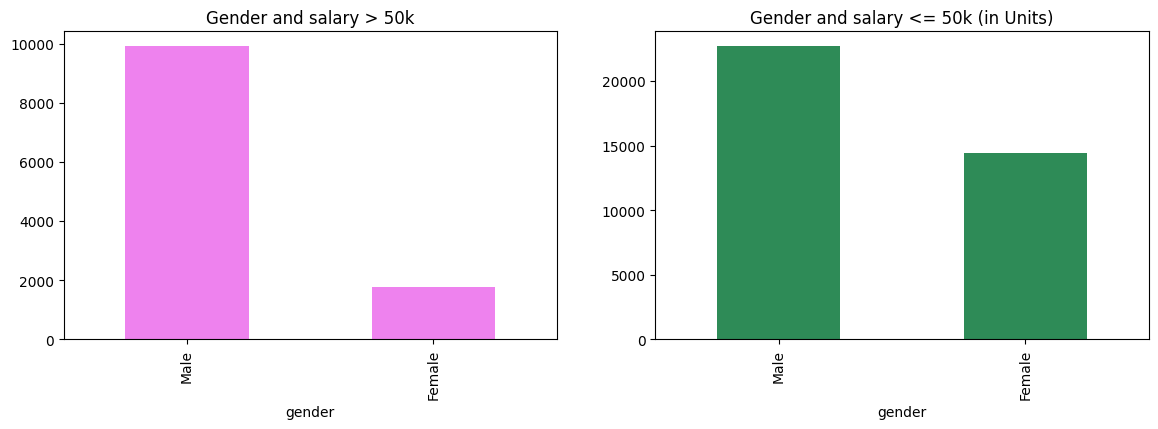

In [116]:
# showing genders with salary over 50k
plt.figure(figsize=(14,4))

# chart of genders making over 50k
plt.subplot(1,2,1)
plt.title('Gender and salary > 50k', fontdict={'fontsize':12})
df[df['income']=='>50K']['gender'].value_counts().plot(kind='bar', legend=None, color='violet')

# chart of genders making under 50K
plt.subplot(1,2,2)
plt.title('Gender and salary <= 50k (in Units)', fontdict={'fontsize':12})
df[df['income']=='<=50K']['gender'].value_counts().plot(kind='bar', legend=None, color='seagreen')

# huge difference between the number of males and females making over 50k

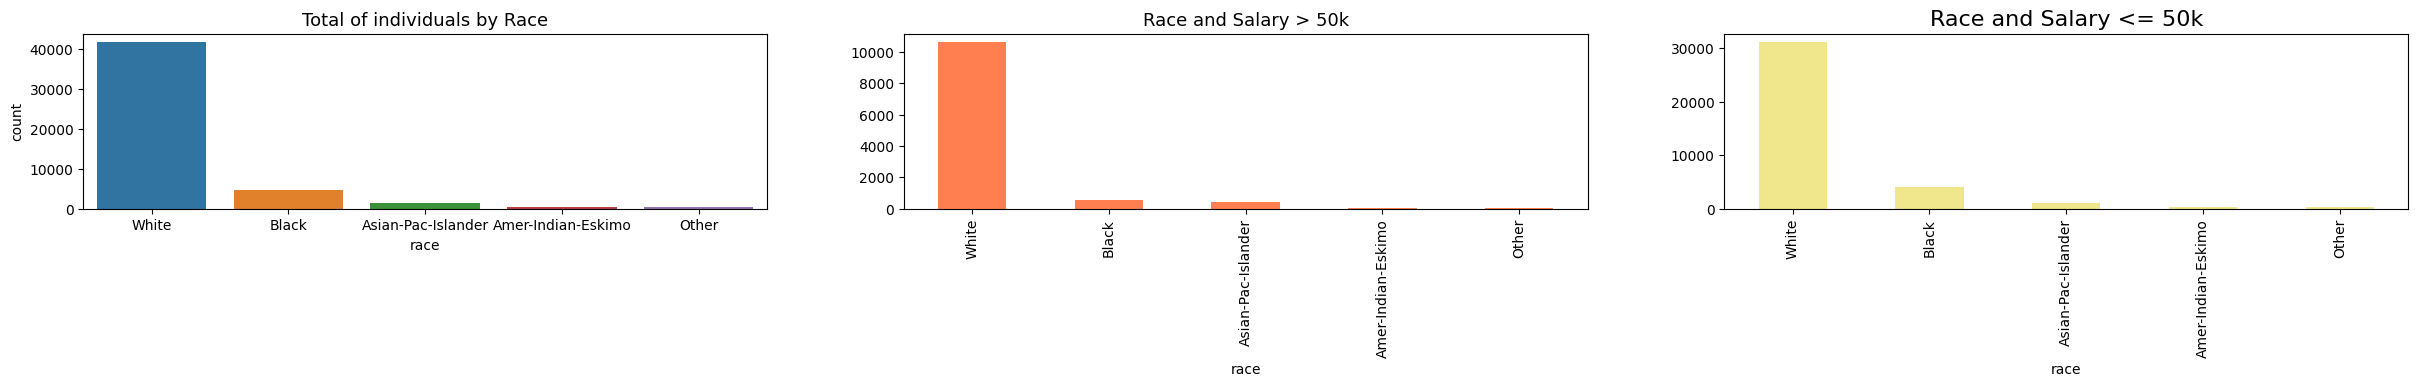

In [117]:
# showing race with salary
plt.figure(figsize=(30,5))

# chart of the total number of individuals by their race
plt.subplot(2,3,1)
plt.title('Total of individuals by Race', fontdict={'fontsize':13})
sns.countplot(x="race", data=df, order=df['race'].value_counts().index)

# race making over 50k
plt.subplot(2,3,2)
plt.title('Race and Salary > 50k', fontdict={'fontsize':13})
df[df['income']=='>50K']['race'].value_counts().plot(kind='bar', legend=None, color='coral')

# race making under 50k
plt.subplot(2,3,3)
plt.title('Race and Salary <= 50k', fontdict={'fontsize':16})
ax = df[df['income']=='<=50K']['race'].value_counts().plot(kind='bar', legend=None, color='khaki')

# predominantly white

In [118]:
# drop categorical columns and add the changed columns of binary feature back to the df
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [119]:
# drop education column since there is already education number
df = df.drop('education', axis=1)

# dropping fnlwgt since it is an unknown column
df = df.drop('fnlwgt', axis=1)

In [120]:
# change the gender and income columns into numerical
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [121]:
df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,1,7688,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,10,0,0,0,30,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,9,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,9,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,9,1,0,0,20,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


<Axes: >

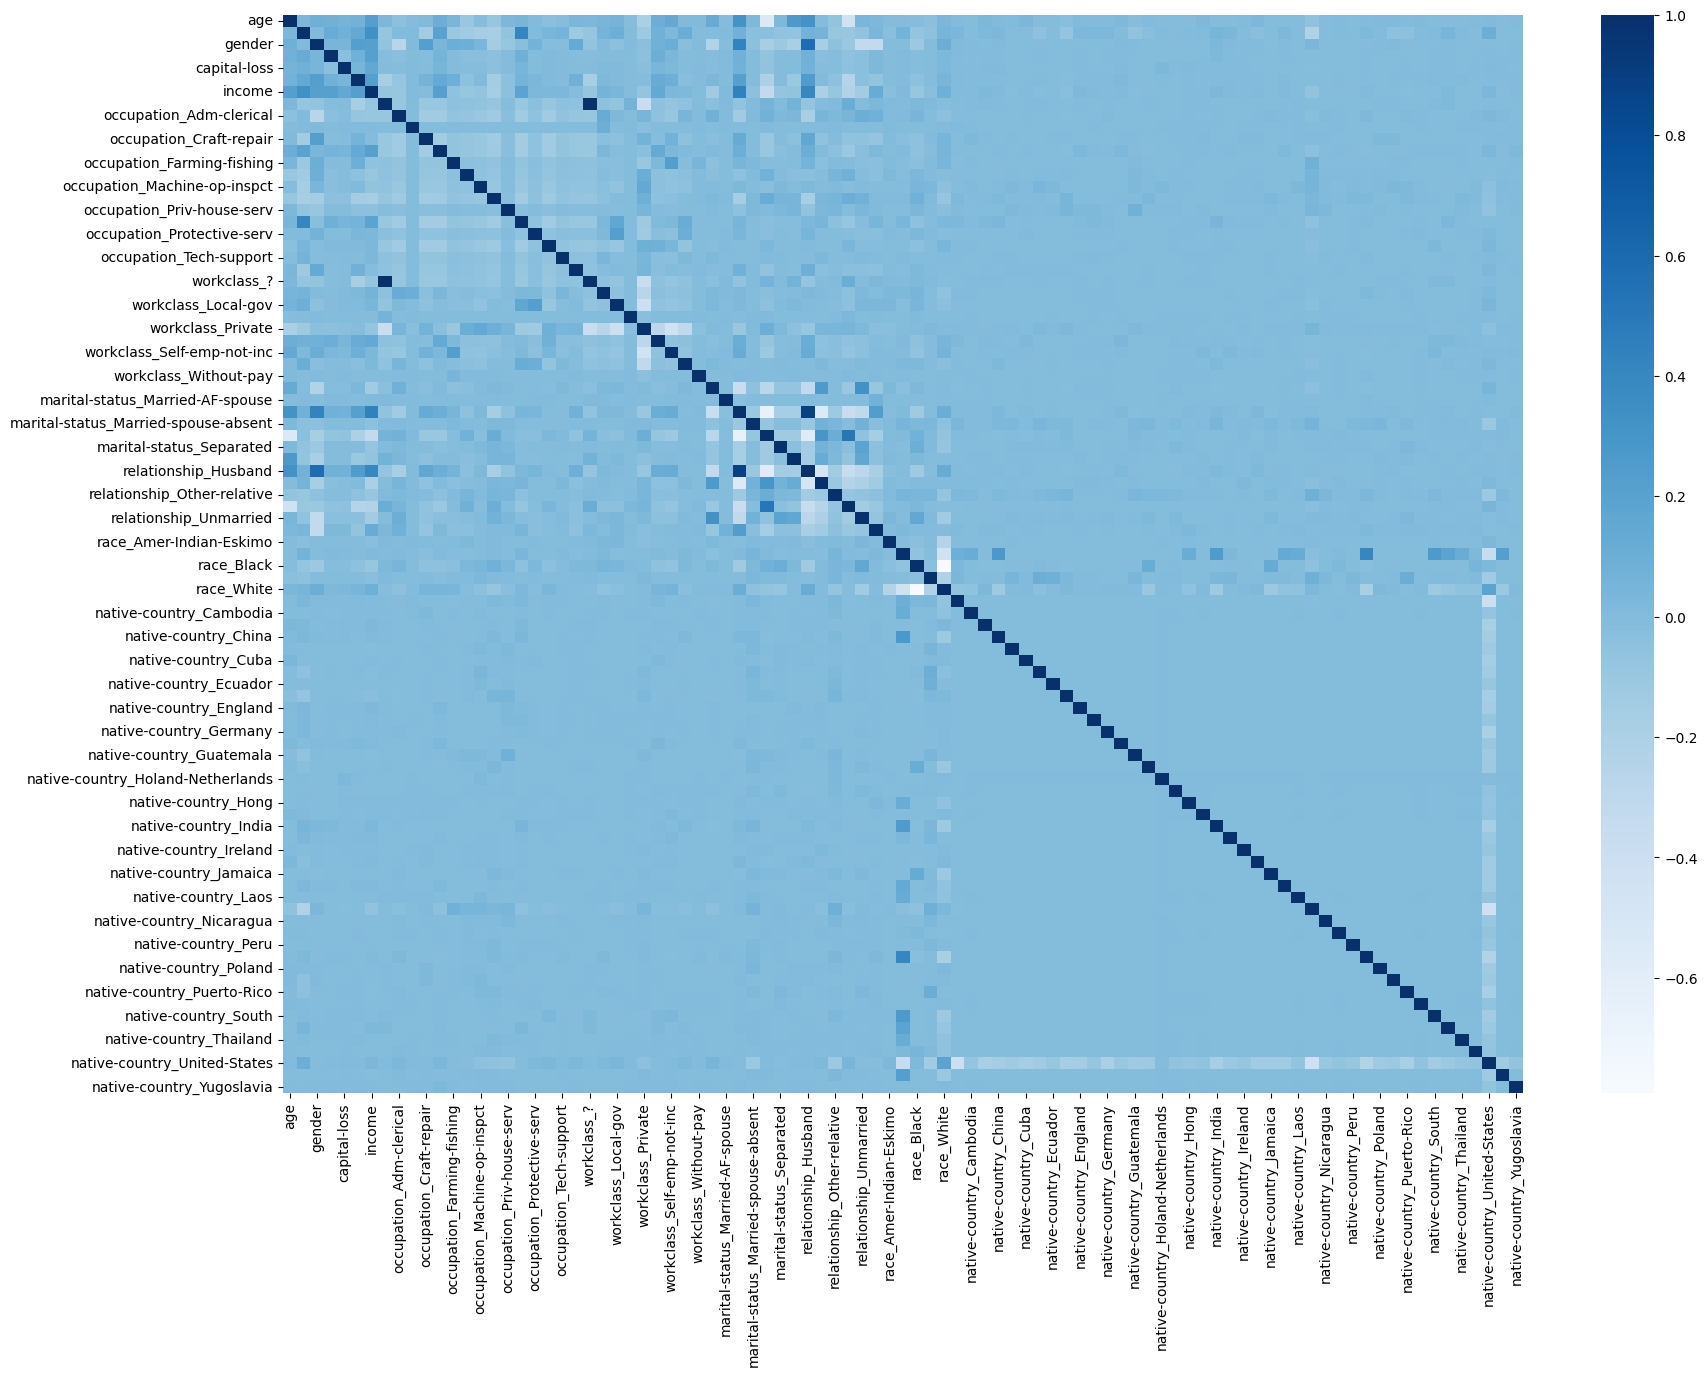

In [122]:
# showing the volumes of the dataset 
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot=False, cmap='Blues')

In [123]:
# show correlation
df.corr()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,0.030635,0.088043,0.077185,0.056838,0.071223,0.230144,0.025968,-0.038134,-0.009193,...,0.006995,0.005437,0.012275,-0.001976,-0.011905,-0.001784,0.001041,0.011339,-0.012373,0.002892
educational-num,0.030635,1.000000,0.009364,0.125219,0.080986,0.143915,0.332802,-0.080342,0.003931,0.004011,...,-0.047870,-0.041830,0.000902,0.012982,0.045450,0.007282,-0.010217,0.103385,-0.007563,-0.005810
gender,0.088043,0.009364,1.000000,0.047127,0.045517,0.228529,0.214639,-0.063969,-0.260126,0.012350,...,0.009656,-0.009941,-0.002178,-0.005272,0.003044,-0.007120,-0.009346,-0.011063,-0.001544,0.005266
capital-gain,0.077185,0.125219,0.047127,1.000000,-0.031475,0.082152,0.223047,-0.019158,-0.029128,-0.001396,...,-0.004361,-0.006147,-0.002320,0.003898,0.004254,-0.002784,-0.003043,0.004131,-0.002679,-0.000477
capital-loss,0.056838,0.080986,0.045517,-0.031475,1.000000,0.054431,0.147542,-0.012315,-0.021481,0.001662,...,-0.008056,0.002622,-0.004508,0.005627,0.003069,-0.002344,0.004022,0.009362,-0.000128,-0.004718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001784,0.007282,-0.007120,-0.002784,-0.002344,0.008555,-0.004229,-0.002574,-0.001159,-0.000435,...,-0.000920,-0.001526,-0.000515,-0.001206,-0.000906,1.000000,-0.000584,-0.073422,-0.001042,-0.000539
native-country_Trinadad&Tobago,0.001041,-0.010217,-0.009346,-0.003043,0.004022,-0.002918,-0.009117,-0.002068,0.007919,-0.000413,...,-0.000873,-0.001448,-0.000488,-0.001144,-0.000859,-0.000584,1.000000,-0.069652,-0.000989,-0.000511
native-country_United-States,0.011339,0.103385,-0.011063,0.004131,0.009362,0.004634,0.032249,0.005326,0.021889,0.002069,...,-0.109766,-0.182122,-0.061424,-0.143878,-0.108114,-0.073422,-0.069652,1.000000,-0.124384,-0.064284
native-country_Vietnam,-0.012373,-0.007563,-0.001544,-0.002679,-0.000128,-0.008305,-0.015561,-0.004081,0.010907,-0.000737,...,-0.001558,-0.002585,-0.000872,-0.002043,-0.001535,-0.001042,-0.000989,-0.124384,1.000000,-0.000913


In [124]:
# selecting a subset of columns that are most correlated with the income column
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [125]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

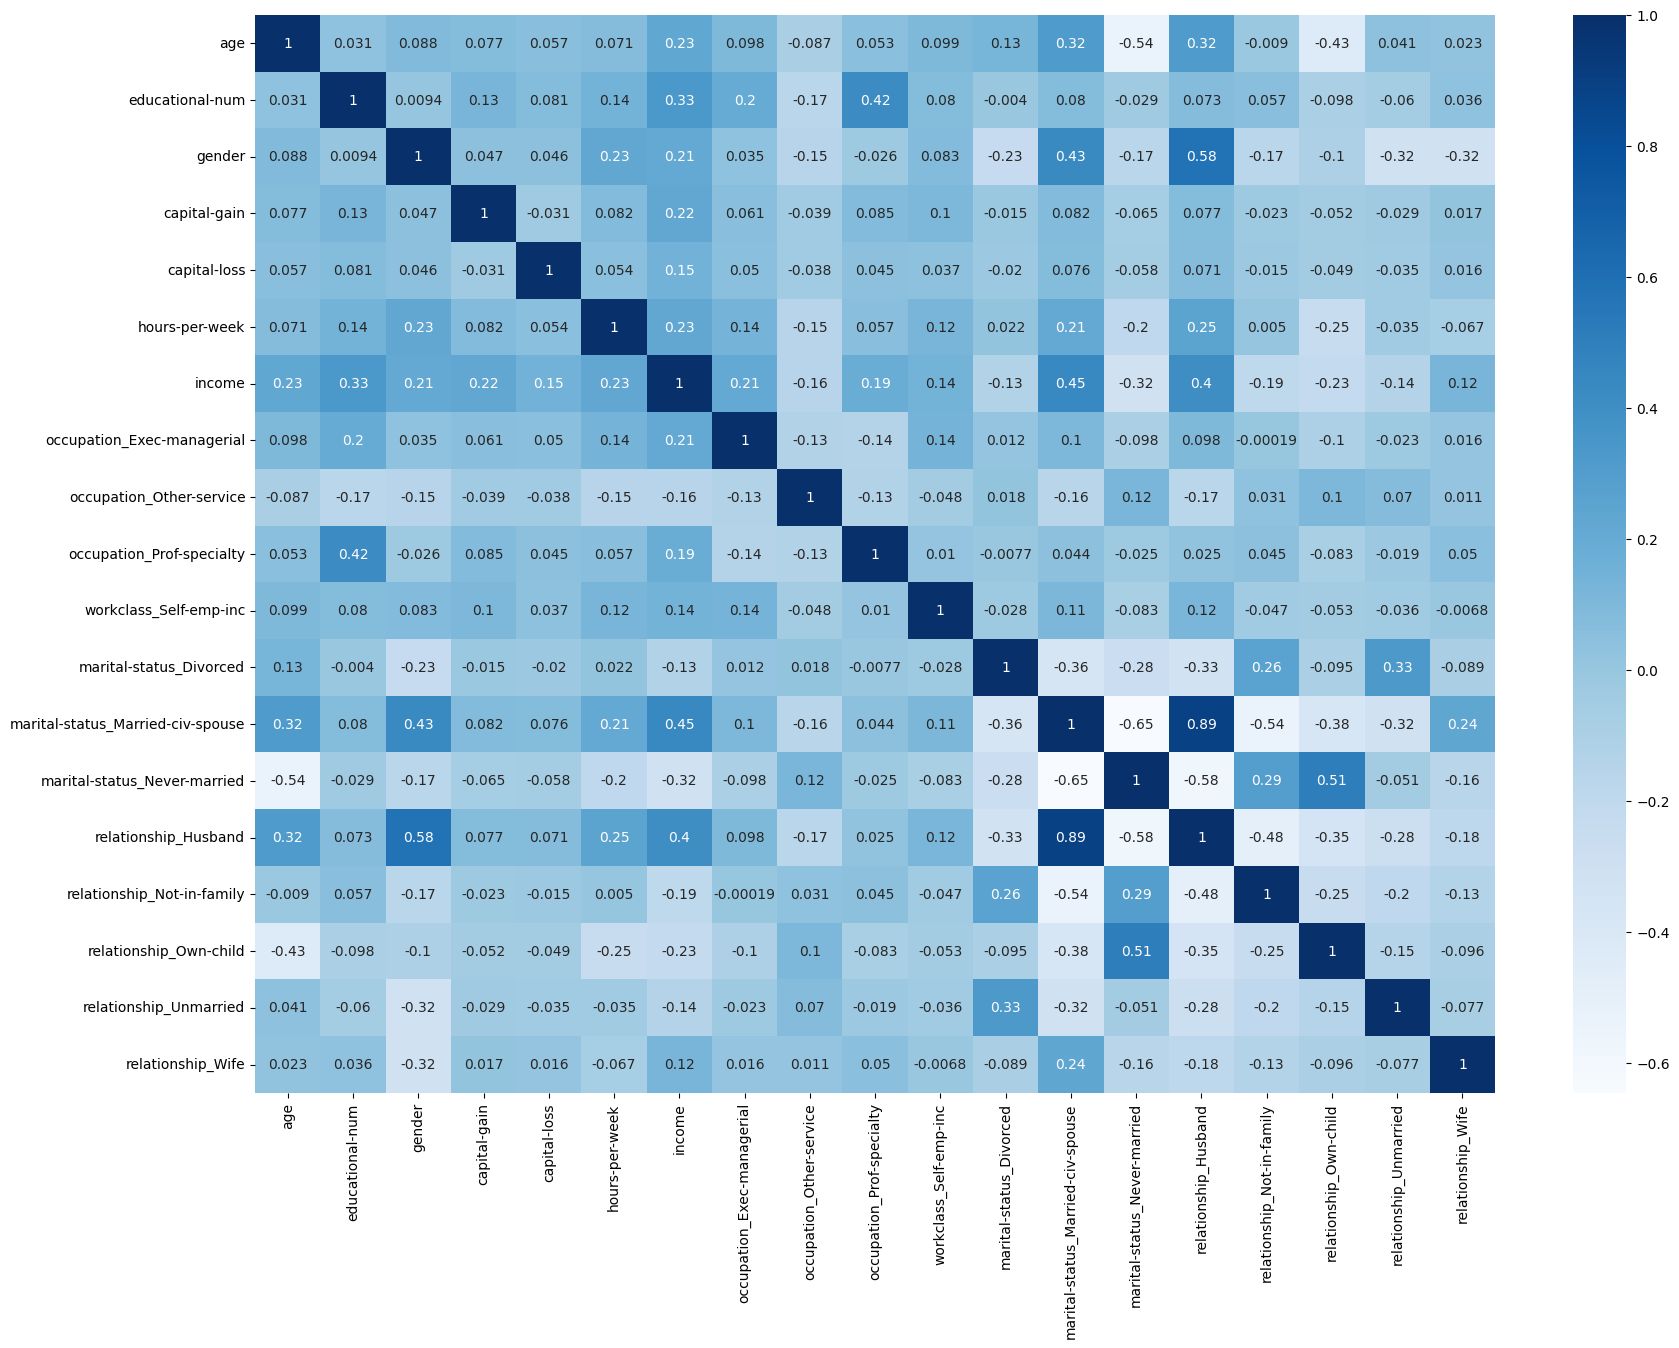

In [126]:
# updated map with the highly correlated columns
plt.figure(figsize=(20,14))
sns.heatmap(df_dropped.corr(),annot=True, cmap='Blues')

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# splitting data into train and test where 20% goes to test
train_df, test_df = train_test_split(df, test_size=0.2)

In [128]:
# splitting the target variable from the dataset
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

In [129]:
# 1st model
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [130]:
# calculates the accuracy of the model's predictions on the test data
forest.score(test_X, test_y)

# 85% score is good

0.8526337364213978

In [131]:
# features that has the most influence on the model's predictions
forest.feature_importances_

array([2.30654484e-01, 1.28636758e-01, 1.53880242e-02, 1.08001118e-01,
       3.59344699e-02, 1.14722716e-01, 1.92305195e-03, 5.06862399e-03,
       8.51781278e-05, 6.20717147e-03, 1.96701282e-02, 4.47973317e-03,
       3.41934986e-03, 4.08284414e-03, 8.69551990e-03, 2.26652717e-04,
       1.79275048e-02, 2.58428459e-03, 6.33776853e-03, 4.09422642e-03,
       4.16026093e-03, 1.83659892e-03, 4.73223062e-03, 5.40469272e-03,
       2.56740450e-06, 9.01540682e-03, 6.18063002e-03, 8.27182228e-03,
       4.37325280e-03, 1.52708015e-04, 7.09307905e-03, 2.99857875e-04,
       6.26558452e-02, 1.06192924e-03, 3.32236954e-02, 1.83960293e-03,
       1.77192369e-03, 4.37069037e-02, 1.25502046e-02, 1.81358769e-03,
       9.54739099e-03, 6.84067061e-03, 9.37176177e-03, 1.52250576e-03,
       3.17607427e-03, 4.91932959e-03, 1.10946840e-03, 6.39084039e-03,
       3.03150308e-03, 3.73319477e-04, 1.47327883e-03, 6.39115154e-04,
       3.33097993e-04, 7.35832157e-04, 2.77667517e-04, 1.28259467e-04,
      

In [132]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [133]:
# creating a dictionary that maps feature names to their corresponding importances
# sorts the dictionary based on feature importances in descending order
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
sorted_importances = []
for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True):
    sorted_importances.append((k, v))

importances = dict(sorted_importances)

In [134]:
importances

# notice that age is the most important, then education, and so on
# this seems reasonable

{'age': 0.2306544836660709,
 'educational-num': 0.12863675791941231,
 'hours-per-week': 0.1147227157852943,
 'capital-gain': 0.10800111805728677,
 'marital-status_Married-civ-spouse': 0.06265584517013136,
 'relationship_Husband': 0.0437069036740147,
 'capital-loss': 0.035934469933746965,
 'marital-status_Never-married': 0.0332236953954303,
 'occupation_Exec-managerial': 0.01967012818206354,
 'occupation_Prof-specialty': 0.017927504813755143,
 'gender': 0.015388024179542346,
 'relationship_Not-in-family': 0.012550204632624195,
 'relationship_Own-child': 0.009547390988029121,
 'relationship_Wife': 0.009371761766430155,
 'workclass_Private': 0.00901540681761058,
 'occupation_Other-service': 0.008695519900434902,
 'workclass_Self-emp-not-inc': 0.008271822280946138,
 'marital-status_Divorced': 0.0070930790515976345,
 'relationship_Unmarried': 0.006840670609347243,
 'native-country_United-States': 0.006415854442753646,
 'race_White': 0.006390840385995641,
 'occupation_Sales': 0.0063377685305

In [135]:
from sklearn.model_selection import GridSearchCV

# defining a grid of hyperparameters for the RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 250], # Number of trees in the random forest ensemble
    'max_depth': [5, 10, 30, 50, None], # Maximum depth of each decision tree
    'min_samples_split': [2, 4, 6], # Minimum number of samples required to split an internal node
    'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for best split
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

In [136]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5; 1/180] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/180] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.829 total time=   0.7s
[CV 2/5; 1/180] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/180] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.7s
[CV 3/5; 1/180] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/180] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.7s
[CV 4/5; 1/180] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/180] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_esti

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 30, 50, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [177]:
# retrieves the best-trained machine learning model found during hyperparameter tuning
forest = grid_search.best_estimator_

In [144]:
# accuracy of the trained RandomForestClassifier model on a test dataset
forest.score(test_X, test_y)

# better score with 86% accuracy

0.8671858987497438

In [145]:
# making another dictionary to show the importances from descending order
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k:v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [147]:
importances

# this time, capital gain is after age, then education 

{'age': 0.1440848581107278,
 'capital-gain': 0.13055223493420354,
 'educational-num': 0.12288140931572088,
 'marital-status_Married-civ-spouse': 0.09817701126137589,
 'hours-per-week': 0.08640877650827476,
 'relationship_Husband': 0.060087000082835025,
 'marital-status_Never-married': 0.04288773080604096,
 'capital-loss': 0.040216466787055274,
 'occupation_Exec-managerial': 0.021256047175740856,
 'occupation_Prof-specialty': 0.019192404670378384,
 'gender': 0.018095949470438112,
 'relationship_Own-child': 0.0171953843211817,
 'relationship_Not-in-family': 0.015603716142802605,
 'relationship_Wife': 0.014234360332708968,
 'occupation_Other-service': 0.01148456986716542,
 'workclass_Private': 0.008666786014662128,
 'marital-status_Divorced': 0.00812856600455674,
 'workclass_Self-emp-not-inc': 0.008073731147513483,
 'relationship_Unmarried': 0.007737921595261306,
 'race_White': 0.006724728541226442,
 'native-country_United-States': 0.006630634421525678,
 'workclass_Self-emp-inc': 0.005908

In [148]:
# 2nd model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [190]:
# will use newton(other solvers had problems) solvers to fit the model to the training data
LogisticModel = LogisticRegression(solver='newton-cg')

# training the LogisticRegression model on the training data
LogisticModel.fit(train_X, train_y)

LogisticRegression(solver='newton-cg')

In [191]:
# predict using the trained model
logistic_predictions = LogisticModel.predict(test_X)

In [192]:
# calculate the accuracy of the model
logistic_accuracy = accuracy_score(test_y, logistic_predictions)

In [193]:
logistic_accuracy

0.8540684566509531

In [173]:
# defining a hyperparameter grid for logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],       # Regularization parameter
    'solver': ['newton-cg', 'newton-cholesky'],
    'max_iter': [100, 200, 300]           # Maximum number of iterations
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='accuracy',      
    verbose=10              
)

In [174]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START C=0.001, max_iter=100, solver=newton-cg....................
[CV 1/5; 1/30] END C=0.001, max_iter=100, solver=newton-cg;, score=0.840 total time=  10.1s
[CV 2/5; 1/30] START C=0.001, max_iter=100, solver=newton-cg....................
[CV 2/5; 1/30] END C=0.001, max_iter=100, solver=newton-cg;, score=0.843 total time=   8.5s
[CV 3/5; 1/30] START C=0.001, max_iter=100, solver=newton-cg....................
[CV 3/5; 1/30] END C=0.001, max_iter=100, solver=newton-cg;, score=0.836 total time=   8.7s
[CV 4/5; 1/30] START C=0.001, max_iter=100, solver=newton-cg....................
[CV 4/5; 1/30] END C=0.001, max_iter=100, solver=newton-cg;, score=0.842 total time=   8.1s
[CV 5/5; 1/30] START C=0.001, max_iter=100, solver=newton-cg....................
[CV 5/5; 1/30] END C=0.001, max_iter=100, solver=newton-cg;, score=0.839 total time=   9.0s
[CV 1/5; 2/30] START C=0.001, max_iter=100, solver=newton-cholesky.......

C:\Users\jiany\Downloads\Program\python\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\jiany\Downloads\Program\python\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\jiany\Downloads\Program\python\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5; 25/30] END C=10, max_iter=100, solver=newton-cg;, score=0.848 total time=  30.5s
[CV 4/5; 25/30] START C=10, max_iter=100, solver=newton-cg......................
[CV 4/5; 25/30] END C=10, max_iter=100, solver=newton-cg;, score=0.853 total time=  30.2s
[CV 5/5; 25/30] START C=10, max_iter=100, solver=newton-cg......................


C:\Users\jiany\Downloads\Program\python\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\jiany\Downloads\Program\python\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\jiany\Downloads\Program\python\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5; 25/30] END C=10, max_iter=100, solver=newton-cg;, score=0.849 total time=  43.0s
[CV 1/5; 26/30] START C=10, max_iter=100, solver=newton-cholesky................
[CV 1/5; 26/30] END C=10, max_iter=100, solver=newton-cholesky;, score=0.853 total time=   1.0s
[CV 2/5; 26/30] START C=10, max_iter=100, solver=newton-cholesky................
[CV 2/5; 26/30] END C=10, max_iter=100, solver=newton-cholesky;, score=0.853 total time=   0.5s
[CV 3/5; 26/30] START C=10, max_iter=100, solver=newton-cholesky................
[CV 3/5; 26/30] END C=10, max_iter=100, solver=newton-cholesky;, score=0.848 total time=   0.7s
[CV 4/5; 26/30] START C=10, max_iter=100, solver=newton-cholesky................
[CV 4/5; 26/30] END C=10, max_iter=100, solver=newton-cholesky;, score=0.853 total time=   0.8s
[CV 5/5; 26/30] START C=10, max_iter=100, solver=newton-cholesky................
[CV 5/5; 26/30] END C=10, max_iter=100, solver=newton-cholesky;, score=0.849 total time=   0.6s
[CV 1/5; 27/30] START C=1

C:\Users\jiany\Downloads\Program\python\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\jiany\Downloads\Program\python\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\jiany\Downloads\Program\python\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5; 27/30] END C=10, max_iter=200, solver=newton-cg;, score=0.848 total time=  32.1s
[CV 4/5; 27/30] START C=10, max_iter=200, solver=newton-cg......................
[CV 4/5; 27/30] END C=10, max_iter=200, solver=newton-cg;, score=0.853 total time=  32.6s
[CV 5/5; 27/30] START C=10, max_iter=200, solver=newton-cg......................


C:\Users\jiany\Downloads\Program\python\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\jiany\Downloads\Program\python\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\jiany\Downloads\Program\python\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5; 27/30] END C=10, max_iter=200, solver=newton-cg;, score=0.849 total time=  43.3s
[CV 1/5; 28/30] START C=10, max_iter=200, solver=newton-cholesky................
[CV 1/5; 28/30] END C=10, max_iter=200, solver=newton-cholesky;, score=0.853 total time=   0.7s
[CV 2/5; 28/30] START C=10, max_iter=200, solver=newton-cholesky................
[CV 2/5; 28/30] END C=10, max_iter=200, solver=newton-cholesky;, score=0.853 total time=   0.6s
[CV 3/5; 28/30] START C=10, max_iter=200, solver=newton-cholesky................
[CV 3/5; 28/30] END C=10, max_iter=200, solver=newton-cholesky;, score=0.848 total time=   0.7s
[CV 4/5; 28/30] START C=10, max_iter=200, solver=newton-cholesky................
[CV 4/5; 28/30] END C=10, max_iter=200, solver=newton-cholesky;, score=0.853 total time=   0.6s
[CV 5/5; 28/30] START C=10, max_iter=200, solver=newton-cholesky................
[CV 5/5; 28/30] END C=10, max_iter=200, solver=newton-cholesky;, score=0.849 total time=   0.5s
[CV 1/5; 29/30] START C=1

C:\Users\jiany\Downloads\Program\python\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\jiany\Downloads\Program\python\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\jiany\Downloads\Program\python\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5; 29/30] END C=10, max_iter=300, solver=newton-cg;, score=0.848 total time=  33.2s
[CV 4/5; 29/30] START C=10, max_iter=300, solver=newton-cg......................
[CV 4/5; 29/30] END C=10, max_iter=300, solver=newton-cg;, score=0.853 total time=  31.3s
[CV 5/5; 29/30] START C=10, max_iter=300, solver=newton-cg......................


C:\Users\jiany\Downloads\Program\python\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\jiany\Downloads\Program\python\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\jiany\Downloads\Program\python\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5; 29/30] END C=10, max_iter=300, solver=newton-cg;, score=0.849 total time=  40.8s
[CV 1/5; 30/30] START C=10, max_iter=300, solver=newton-cholesky................
[CV 1/5; 30/30] END C=10, max_iter=300, solver=newton-cholesky;, score=0.853 total time=   0.7s
[CV 2/5; 30/30] START C=10, max_iter=300, solver=newton-cholesky................
[CV 2/5; 30/30] END C=10, max_iter=300, solver=newton-cholesky;, score=0.853 total time=   0.5s
[CV 3/5; 30/30] START C=10, max_iter=300, solver=newton-cholesky................
[CV 3/5; 30/30] END C=10, max_iter=300, solver=newton-cholesky;, score=0.848 total time=   0.7s
[CV 4/5; 30/30] START C=10, max_iter=300, solver=newton-cholesky................
[CV 4/5; 30/30] END C=10, max_iter=300, solver=newton-cholesky;, score=0.853 total time=   0.5s
[CV 5/5; 30/30] START C=10, max_iter=300, solver=newton-cholesky................
[CV 5/5; 30/30] END C=10, max_iter=300, solver=newton-cholesky;, score=0.849 total time=   0.9s


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 300],
                         'solver': ['newton-cg', 'newton-cholesky']},
             scoring='accuracy', verbose=10)

In [175]:
grid_search.best_params_

{'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}

In [195]:
logistic = grid_search.best_estimator_

In [196]:
predictions = logistic.predict(test_X)
BestAccuracy = accuracy_score(test_y, best_predictions)

In [200]:
BestAccuracy
# no change from before hyperparameter tuning

0.8540684566509531

In [206]:
# Get the coefficients of the best trained logistic regression model
coefficients = logistic.coef_[0]

# Create a dictionary that maps feature names to their coefficients and sort in descending order
feature_importances = {feature: coefficient for feature, coefficient in zip(train_X.columns, coefficients)}
sorted_importances = sorted(feature_coefficient_mapping.items(), key=lambda x: x[1], reverse=True)

In [207]:
sorted_importances

[('marital-status_Married-civ-spouse', 1.4905135214470666),
 ('marital-status_Married-AF-spouse', 1.3386417717676211),
 ('native-country_Cambodia', 1.2112326345696807),
 ('relationship_Wife', 1.126807788336301),
 ('native-country_Portugal', 0.9905418670591167),
 ('occupation_Exec-managerial', 0.8740357279557079),
 ('native-country_Italy', 0.8243116364334732),
 ('gender', 0.7443351961016884),
 ('native-country_Ireland', 0.7414174069915982),
 ('native-country_France', 0.6826188218133221),
 ('occupation_Prof-specialty', 0.6564670104526824),
 ('occupation_Tech-support', 0.6386418656102695),
 ('native-country_Canada', 0.6200117442770667),
 ('native-country_Philippines', 0.6058015653374216),
 ('workclass_Federal-gov', 0.5898120775115115),
 ('occupation_Protective-serv', 0.5397309853078485),
 ('native-country_Yugoslavia', 0.5263658629234018),
 ('occupation_Armed-Forces', 0.4692594812377021),
 ('native-country_Jamaica', 0.4545563348318288),
 ('native-country_Japan', 0.37806110692475187),
 ('oc

In [208]:
# the RandomForestClassifier had a better accuracy score than the logisticRegression
# given the dictionary created from using LogisticRegression, it does not seem to be accurate
# it seems unreasonable for age to be a less important factor than marital status
# the RandomForestClassifier model is more reliable than logisticRegression for this dataset